In [1]:
import cira 

cira.auth.KEY_FILE = "../../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

The current asking price for BTC/USD is 65872.944
                            symbol      open      high       low     close  \
timestamp                                                                    
2021-01-01 06:00:00+00:00  BTC/USD  29255.71  29682.29  28707.56  29676.79   
2021-01-02 06:00:00+00:00  BTC/USD  29678.34  34200.00  29555.99  33769.52   
2021-01-03 06:00:00+00:00  BTC/USD  33769.52  34812.93  32300.61  32908.02   
2021-01-04 06:00:00+00:00  BTC/USD  32907.36  33496.03  27900.00  30441.57   
2021-01-05 06:00:00+00:00  BTC/USD  30461.84  35851.42  29927.55  35063.00   

                                volume  trade_count          vwap  
timestamp                                                          
2021-01-01 06:00:00+00:00   848.874030      29639.0  29316.444625  
2021-01-02 06:00:00+00:00  2144.592516      60152.0  31941.412694  
2021-01-03 06:00:00+00:00  1838.695433      58725.0  33505.269474  
2021-01-04 06:00:00+00:00  2711.189503      69226.0  31267.9651

<Axes: xlabel='timestamp'>

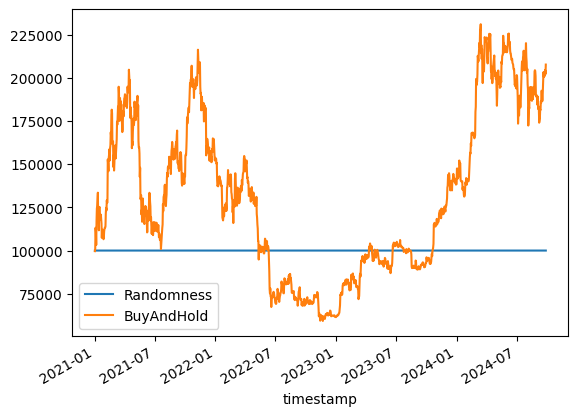

In [2]:
import cira
from datetime import datetime
import matplotlib.pyplot as plt

#assert not cira.auth.check_keys() # No keys are needed

SYMBOL = "BTC/USD"
ast = cira.Cryptocurrency(SYMBOL)

print(f"The current asking price for {SYMBOL} is {ast.price()}")


# alpaca only have BTC data from 2021 and forward 
data = ast.historical_data_df(datetime(2021, 1, 1), datetime.now().date())
print(data.head())

# All of strategies and backtesting works with out keys as well. 
strat = cira.strategy.strategies.Randomness()
cira.strategy.backtest.back_test_against_buy_and_hold(strat, data, data["open"].to_frame(), 100_000).plot()

In [3]:
strat = cira.strategy.strategies.Randomness()